# Project Data Cleaning - Univelcity Bootcamp

### By: Okonkwo Obinna Uzochukwu
#### Project 5.1

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'1.2.4'

In [3]:
pd.options.display.min_rows = 20

In [4]:
autos = pd.read_csv('https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
autos.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [6]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make',
       'model','trany', 'range', 'createdOn', 'year']

In [8]:
autos[cols].dtypes

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

In [9]:
autos[cols].memory_usage(deep=True)

Index             128
city08         329152
comb08         329152
highway08      329152
cylinders      329152
displ          329152
drive         3028369
eng_dscr      2135693
fuelCost08     329152
make          2606267
model         2813134
trany         2933276
range          329152
createdOn     3497240
year           329152
dtype: int64

In [10]:
autos[cols].memory_usage(deep=True).sum()

19647323

In [11]:
autos[cols].select_dtypes(int).describe()

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [12]:
# Chaining

(autos
[cols]
.select_dtypes(int)
.describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [13]:
#can comb08 be an int8

np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [14]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [15]:
(autos
[cols]
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16'})
.select_dtypes([int, 'int8'])
.describe()
)

,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000
mean,24.504667,2362.335942,0.793506,2001.535266
std,7.730364,654.981925,13.041592,11.142414
min,9.000000,500.000000,0.000000,1984.000000
25%,20.000000,1900.000000,0.000000,1991.000000
50%,24.000000,2350.000000,0.000000,2002.000000
75%,28.000000,2700.000000,0.000000,2011.000000
max,124.000000,7400.000000,370.000000,2020.000000


In [16]:
(autos
[cols]
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16'})
.select_dtypes(['integer'])
.describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [17]:
(autos
[cols]
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16'})
.memory_usage(deep=True)
.sum()
)

18124995

In [18]:
(autos
[cols]
.select_dtypes('float')
)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
5,4.0,1.8
6,4.0,1.8
7,4.0,1.6
8,4.0,1.6
9,4.0,1.8


In [19]:
autos.cylinders.describe()

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

In [20]:
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [21]:
(autos
[cols]
[autos.cylinders.isna()]
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2000
8143,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2001
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8146,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
9212,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2002
9213,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2002
10329,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2003
21413,22,24,28,NaN,NaN,4-Wheel Drive,NaN,1750,Subaru,RX Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985


In [22]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0))
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16'})

.describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.688460,3.277904,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.797009,1.373415,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,0.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


In [23]:
(autos
[cols]
.describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,40938.000000,40940.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.717084,3.294238,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.755517,1.357151,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,2.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


In [24]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [25]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0).astype('float16'))
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16'})
.head()
)


,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


In [26]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0).astype('float16'))
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16'})
.memory_usage(deep=True)
.sum()
)


17590123

## Objects

In [27]:
(autos
[cols]
.select_dtypes('object')
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,NaN,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


In [28]:
(autos
.drive
.value_counts(dropna=False)
)

Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

In [29]:
(autos
[cols]
[autos.drive.isna()]
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
18217,18,21,25,4.0,2.0,NaN,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18218,20,22,26,4.0,1.5,NaN,(FFS),1900,Bertone,X1/9,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18219,13,15,20,8.0,5.7,NaN,(350 V8) (FFS),2800,Chevrolet,Corvette,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18220,13,15,20,8.0,5.7,NaN,(350 V8) (FFS),2800,Chevrolet,Corvette,Manual 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18221,15,17,20,6.0,3.0,NaN,"(FFS,TRBO)",2500,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18222,16,18,20,6.0,3.0,NaN,(FFS),2350,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18223,16,18,22,6.0,3.0,NaN,"(FFS,TRBO)",2350,Nissan,300ZX,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984


In [30]:
(autos
[cols]
.groupby('year')
.drive
.nunique()
)

year
1984    3
1985    4
1986    4
1987    3
1988    3
1989    3
1990    3
1991    3
1992    3
1993    3
1994    3
1995    4
1996    3
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    3
2009    4
2010    6
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
Name: drive, dtype: int64

In [31]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0).astype('float16'),
       drive=autos.drive.fillna('Other').astype('category')
       )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16', 'make': 'category'})
.memory_usage(deep=True)
.sum()
)


12093275

In [32]:
(autos
.trany
.value_counts(dropna=False)
)

Automatic 4-spd                     11047
Manual 5-spd                         8361
Automatic 3-spd                      3151
Automatic (S6)                       3106
Manual 6-spd                         2757
Automatic 5-spd                      2203
Automatic (S8)                       1665
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      826
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       245
Automatic (S4)                        233
Automatic (AV-S6)                     208
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       124
Automatic (AM-S6)                 

In [33]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0).astype('float16'),
       drive=autos.drive.fillna('Other').astype('category'),
       automatic=autos.trany.str.contains('Auto'),
       speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8')
       )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16', 'make': 'category'})
.drop(columns=['trany'])
.memory_usage(deep=True)
.sum()
)


10631047

In [34]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0).astype('float16'),
       drive=autos.drive.fillna('Other').astype('category'),
       automatic=autos.trany.str.contains('Auto'),
       speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
       createdOn=pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')
       )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16', 'make': 'category'})
.drop(columns=['trany'])
.memory_usage(deep=True)
.sum()
)


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


7462959

In [35]:
autos[cols].createdOn[:1]

0    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, dtype: object

In [36]:
(autos
[cols]
.assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
       displ=autos.displ.fillna(0).astype('float16'),
       drive=autos.drive.fillna('Other').astype('category'),
       automatic=autos.trany.str.contains('Auto'),
       speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
       createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST': '-05:00'}, regex=True))
       )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
         'range': 'int16', 'year': 'int16', 'make': 'category'})
.drop(columns=['trany'])
.eng_dscr
.value_counts(dropna=False)
)


NaN                             16153
(FFS)                            8827
SIDI                             5526
(FFS) CA model                    926
(FFS)      (MPFI)                 734
FFV                               701
(FFS,TRBO)                        666
(350 V8) (FFS)                    411
(GUZZLER)  (FFS)                  366
SOHC                              354
                                ...  
RNG=370                             1
(FFS,TRBO) Low Boost                1
(FFS)      (FFS)                    1
(FFS) 1 barrel carb                 1
B234E4 (FFS,TRBO) High Power        1
Shelby GT500; Coupe or Conv.        1
V8                                  1
320-500                             1
(GUZZLER)  (VOLVO780) (FFS)         1
SOHC L-5                            1
Name: eng_dscr, Length: 558, dtype: int64

In [37]:
autos[cols].createdOn[:1]

0    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, dtype: object

In [38]:
autos[cols]

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4.0,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12.0,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4.0,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8.0,5.2,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4.0,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4.0,1.8,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4.0,1.8,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4.0,1.6,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4.0,1.6,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4.0,1.8,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


In [39]:
def tweak_autos(autos):
    return (autos
    [cols]
    .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
           displ=autos.displ.fillna(0).astype('float16'),
           drive=autos.drive.fillna('Other').astype('category'),
           automatic=autos.trany.str.contains('Auto'),
           speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
           createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST': '-05:00'}, regex=True)),
           ffs=autos.eng_dscr.str.contains('FFS') 
           )
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
             'range': 'int16', 'year': 'int16', 'make': 'category'})
    .drop(columns=['trany', 'eng_dscr'])
    )
tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.799805,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.799805,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.599609,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.599609,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.799805,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


In [40]:
from IPython.display import display



def get_var(df, var_name):
    globals()[var_name] = df
    return df



def tweak_autos(autos):
    return (autos
    [cols]
    # create var
    #.pipe(get_var, 'df3')
    .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
           displ=autos.displ.fillna(0).astype('float16'),
           drive=autos.drive.fillna('Other').astype('category'),
           automatic=autos.trany.str.contains('Auto'),
           speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
           createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST': '-05:00'}, regex=True)),
           ffs=autos.eng_dscr.str.contains('FFS') 
           )
    # debug pipe
    #.pipe(lambda df: display(df) or df)
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
             'range': 'int16', 'year': 'int16', 'make': 'category'})
    .drop(columns=['trany', 'eng_dscr'])
    )
auto2 = tweak_autos(autos)

In [41]:
# inspect intermediate dataframe

df3

NameError: name 'df3' is not defined

In [42]:
# try to be more Euro - Centric

def to_lper100km(val):
    return 235.215 /val

auto2.city08.apply(to_lper100km)

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
           ...    
41134    13.067500
41135    10.226739
41136    11.200714
41137     9.800625
41138    11.200714
41139    12.379737
41140    11.760750
41141    13.067500
41142    13.067500
41143    14.700938
Name: city08, Length: 41144, dtype: float64

In [43]:
# this gives the same result

235.215/auto2.city08

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
           ...    
41134    13.067500
41135    10.226739
41136    11.200714
41137     9.800625
41138    11.200714
41139    12.379737
41140    11.760750
41141    13.067500
41142    13.067500
41143    14.700938
Name: city08, Length: 41144, dtype: float64

In [44]:
%%timeit
auto2.city08.apply(to_lper100km)

10.1 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%%timeit
235.215/auto2.city08

297 µs ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
autos.make.unique()

array(['Alfa Romeo', 'Ferrari', 'Dodge', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'CX Automotive', 'Nissan', 'Ford', 'Hyundai',
       'Infiniti', 'Lexus', 'Mercury', 'Mazda', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Rolls-Royce', 'Eagle', 'Lincoln', 'Mercedes-Benz',
       'GMC', 'Saab', 'Honda', 'Saturn', 'Mitsubishi', 'Isuzu', 'Jeep',
       'AM General', 'Geo', 'Suzuki', 'E. P. Dutton, Inc.', 'Land Rover',
       'PAS, Inc', 'Acura', 'Jaguar', 'Lotus', 'Grumman Olson', 'Porsche',
       'American Motors Corporation', 'Kia', 'Lamborghini',
       'Panoz Auto-Development', 'Maserati', 'Saleen', 'Aston Martin',
       'Dabryan Coach Builders Inc', 'Federal Coach', 'Vector', 'Bentley',
       'Daewoo', 'Qvale', 'Roush Performance', 'Autokraft Limited',
       'Bertone', 'Panther Car Company Limited', 'Texas Coach Company',
       'TVR Engineering Ltd', 'Morgan', 'MINI', 'Yugo', 'BMW Alpina',
       'Renaul

In [47]:
def is_american(value):
    return value in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}

In [48]:
%%timeit
auto2.make.apply(is_american)

2.43 ms ± 679 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
%%timeit
auto2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})

918 µs ± 97.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
auto3 = auto2.assign(make=auto2.make.astype(str))

In [51]:
%%timeit
auto3.make.apply(is_american)

9.28 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%%timeit
auto3.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})

2.57 ms ± 742 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
def country(value):
    if value in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}:
        return 'US'
    else:
        return 'Other'

In [54]:
%%timeit
(auto2
 .assign(country=auto2.make.apply(country))
)

5.06 ms ± 660 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%%timeit
values = {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}
(auto2
 .assign(origin='US')
 .assign(country=lambda df_: df_.origin.where(df_.make.isin(values), 'Other'))
)

10.6 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%%timeit
values = {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}
(auto2
 .assign(country=np.select([auto2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})], ['US'], 'Other'))
)

7.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
%%timeit
values = {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}
(auto2
 .assign(country=np.where(auto2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}), 'US', 'Other'))
)

6.7 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
(auto2
 .groupby('year')
 .mean()
 [['city08','comb08']]
).shape

(37, 2)

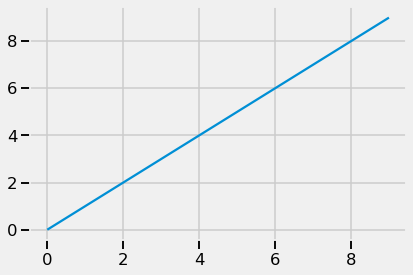

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context('talk')
plt.plot(range(10))

In [82]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


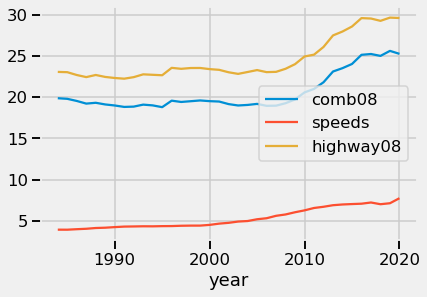

In [83]:
(auto2
 .groupby('year')
 [['comb08', 'speeds', 'highway08']]
 .mean()
 #.quantile(.99)
 .plot()
);

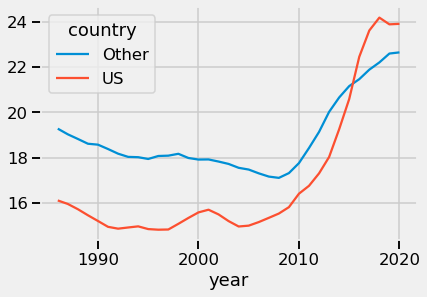

In [84]:
(auto2
 .assign(country=auto2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
 .city08
 .rolling(3)
 .mean()
 #.quantile(.99)
 .plot()
);

In [68]:
auto2.dtypes

city08           int16
comb08           int16
highway08         int8
cylinders         int8
displ          float16
drive         category
fuelCost08       int16
make          category
model           object
range            int16
createdOn       object
year             int16
automatic       object
speeds            int8
ffs             object
dtype: object

In [74]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y])
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x and y